In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Regresión: 

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

### Clasificación: 

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

### Importar modelos: 

In [4]:
import sklearn

In [5]:
dir(sklearn.linear_model)

['ARDRegression',
 'BayesianRidge',
 'ElasticNet',
 'ElasticNetCV',
 'GammaRegressor',
 'Hinge',
 'Huber',
 'HuberRegressor',
 'Lars',
 'LarsCV',
 'Lasso',
 'LassoCV',
 'LassoLars',
 'LassoLarsCV',
 'LassoLarsIC',
 'LinearRegression',
 'Log',
 'LogisticRegression',
 'LogisticRegressionCV',
 'ModifiedHuber',
 'MultiTaskElasticNet',
 'MultiTaskElasticNetCV',
 'MultiTaskLasso',
 'MultiTaskLassoCV',
 'OrthogonalMatchingPursuit',
 'OrthogonalMatchingPursuitCV',
 'PassiveAggressiveClassifier',
 'PassiveAggressiveRegressor',
 'Perceptron',
 'PoissonRegressor',
 'QuantileRegressor',
 'RANSACRegressor',
 'Ridge',
 'RidgeCV',
 'RidgeClassifier',
 'RidgeClassifierCV',
 'SGDClassifier',
 'SGDOneClassSVM',
 'SGDRegressor',
 'SquaredLoss',
 'TheilSenRegressor',
 'TweedieRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_bayes',
 '_cd_fast',
 '_coordinate_descent',
 '_glm',
 '_huber',
 '_l

In [6]:
from sklearn import datasets

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris

In [8]:
diabetes_data = load_diabetes()
iris_data = load_iris()

In [9]:
print(diabetes_data.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [10]:
## Correlaciones
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [11]:
x_dia

NameError: name 'x_dia' is not defined

In [ ]:
x_dia = diabetes_data.data[:,2]
y_dia = diabetes_data.target
corr,p_value = pearsonr(x_dia, y_dia)
print("Coeficiente de correlación de Pearson: ", corr)

Coeficiente de correlación de Pearson:  0.5864501344746887


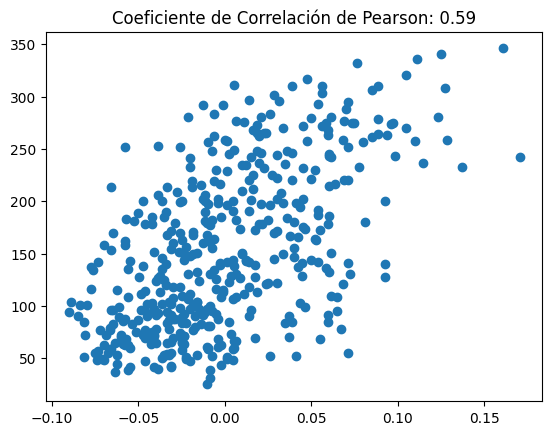

In [ ]:
plt.scatter(x_dia,y_dia)
plt.title(f'Coeficiente de Correlación de Pearson: {corr:.2f}')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler #normalización

In [ ]:
y = diabetes_data.target
scaler = MinMaxScaler()
scaler.fit(y.reshape(-1,1))
y_scaled = scaler.transform(y.reshape(-1,1))

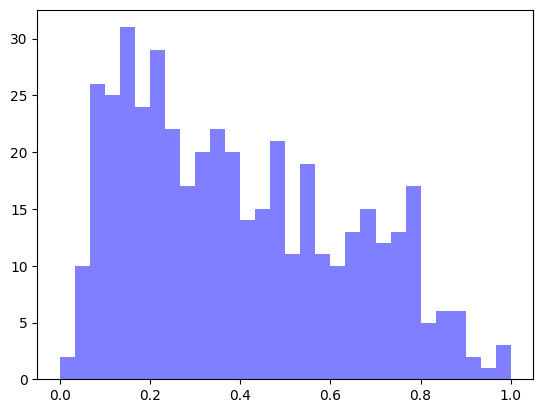

In [ ]:
plt.hist(y_scaled, bins=30, color="blue", alpha = 0.5)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7840921300>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7842fab310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f78409210f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f784093e650>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7842faba90>],
 'means': []}

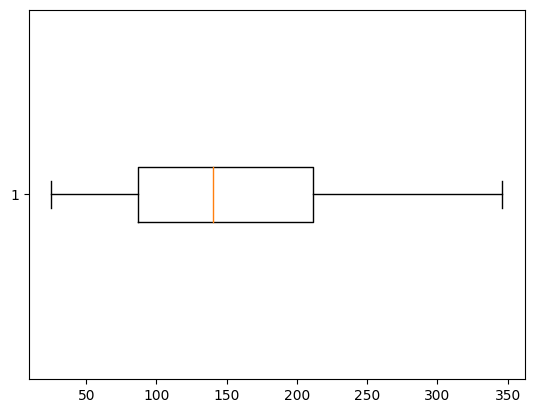

In [ ]:
### Outliers
y = diabetes_data.target
q1,q3 = np.percentile(y, [25,75])
iqr = q3 - q1
min_value = q1 - (1.5*iqr)
max_value = q3 + (1.5*iqr)
y_filtered = y[(y>=min_value) & (y<=max_value)]
plt.boxplot(y, vert=False)

In [ ]:
### Skewness
y = diabetes_data.target
skewness = round(float(np.mean(y) - np.median(y)) / np.std(y), 2)
print('skewnewss: ', skewness)

skewnewss:  0.15


(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

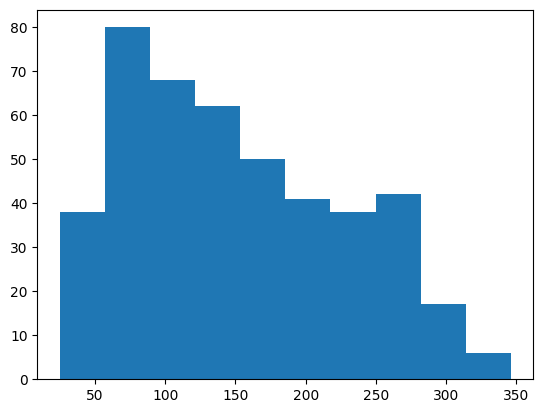

In [ ]:
plt.hist(y)

In [ ]:
from scipy.stats import skew
y_dia = diabetes_data.target
skewness = skew(y_dia)
print(skewness)

0.43906639932477265


(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

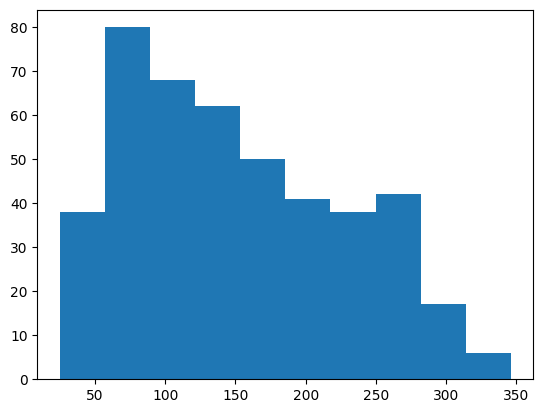

In [ ]:
plt.hist(y_dia)

### Regresión

In [ ]:
# Ejemplo de regresión en diabetes
X = diabetes_data.data
y = diabetes_data.target
# División train/test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=357)
#Instancia del modelo
reg = LinearRegression()
#Entrenamos el modelo
reg.fit(X_train, y_train)
#Hacemos predicciones sobre el test
Y_pred = reg.predict(X_test)
#Evaluación
score = reg.score(X_test,y_test)
print(score)

0.47195769285754285


### Clasificación

In [ ]:
iris = datasets.load_iris()

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=357)
regl = LogisticRegression()
#Entrenamos el modelo
regl.fit(X_train, y_train)
#Hacemos predicciones sobre el test
Y_pred = regl.predict(X_test)
#Evaluación
score = regl.score(X_test,y_test)
print(score)

0.9777777777777777


/home/deme/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### FASTML

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
from pycaret.classification import *

In [ ]:
s = setup(iris_df, target='target',session_id=357)

,Description,Value
0,Session id,357
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(150, 5)"
4,Transformed data shape,"(150, 5)"
5,Transformed train set shape,"(105, 5)"
6,Transformed test set shape,"(45, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9818,0.9988,0.9818,0.9864,0.9818,0.9728,0.9750,0.0590
lda,Linear Discriminant Analysis,0.9818,1.0000,0.9818,0.9864,0.9818,0.9728,0.9750,0.0400
dt,Decision Tree Classifier,0.9809,0.9866,0.9809,0.9857,0.9809,0.9715,0.9739,0.0330
lr,Logistic Regression,0.9727,0.9976,0.9727,0.9750,0.9727,0.9589,0.9600,0.3560
qda,Quadratic Discriminant Analysis,0.9727,1.0000,0.9727,0.9795,0.9727,0.9593,0.9625,0.0340
lightgbm,Light Gradient Boosting Machine,0.9727,0.9877,0.9727,0.9791,0.9723,0.9589,0.9622,0.0550
gbc,Gradient Boosting Classifier,0.9718,0.9989,0.9718,0.9784,0.9714,0.9576,0.9611,0.1470
nb,Naive Bayes,0.9636,0.9951,0.9636,0.9677,0.9632,0.9450,0.9472,0.0340
et,Extra Trees Classifier,0.9636,0.9976,0.9636,0.9677,0.9632,0.9450,0.9472,0.1140
xgboost,Extreme Gradient Boosting,0.9636,0.9963,0.9636,0.9742,0.9609,0.9446,0.9509,0.0510


In [ ]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9878,0.9091,0.9318,0.9091,0.8642,0.8750
1,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [ ]:
tune_ada = tune_model(ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9756,0.9091,0.9318,0.9091,0.8642,0.8750
1,0.9091,1.0000,0.9091,0.9318,0.9091,0.8642,0.8750
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9091,1.0000,0.9091,0.9273,0.9051,0.8608,0.8721
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


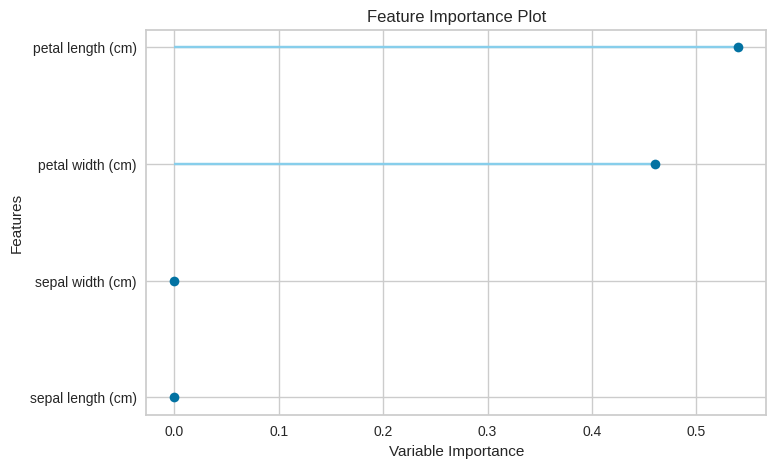

In [ ]:
plot_model(tune_ada,plot='feature')

In [ ]:
evaluate_model(tune_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
final_ada = finalize_model(tune_ada)

In [ ]:
save_model(final_ada,'clasificador_flores')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['sepal length (cm)',
                                              'sepal width (cm)',
                                              'petal length (cm)',
                                              'petal width (cm)'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
             